In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential
import tensorflow as tf

In [2]:
def load_rand():
    X=[]
    dir_path=r'C:\Users\fadel\Documents\datasets\dataset\train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X
    

In [3]:
X=load_rand()

100%|██████████| 6/6 [00:00<00:00, 44.43it/s]

freshapples
freshbanana
freshoranges
rottenapples
rottenbanana
rottenoranges


In [4]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenoranges', 'rottenapples', 'freshbanana', 'freshoranges', 'rottenbanana', 'freshapples']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

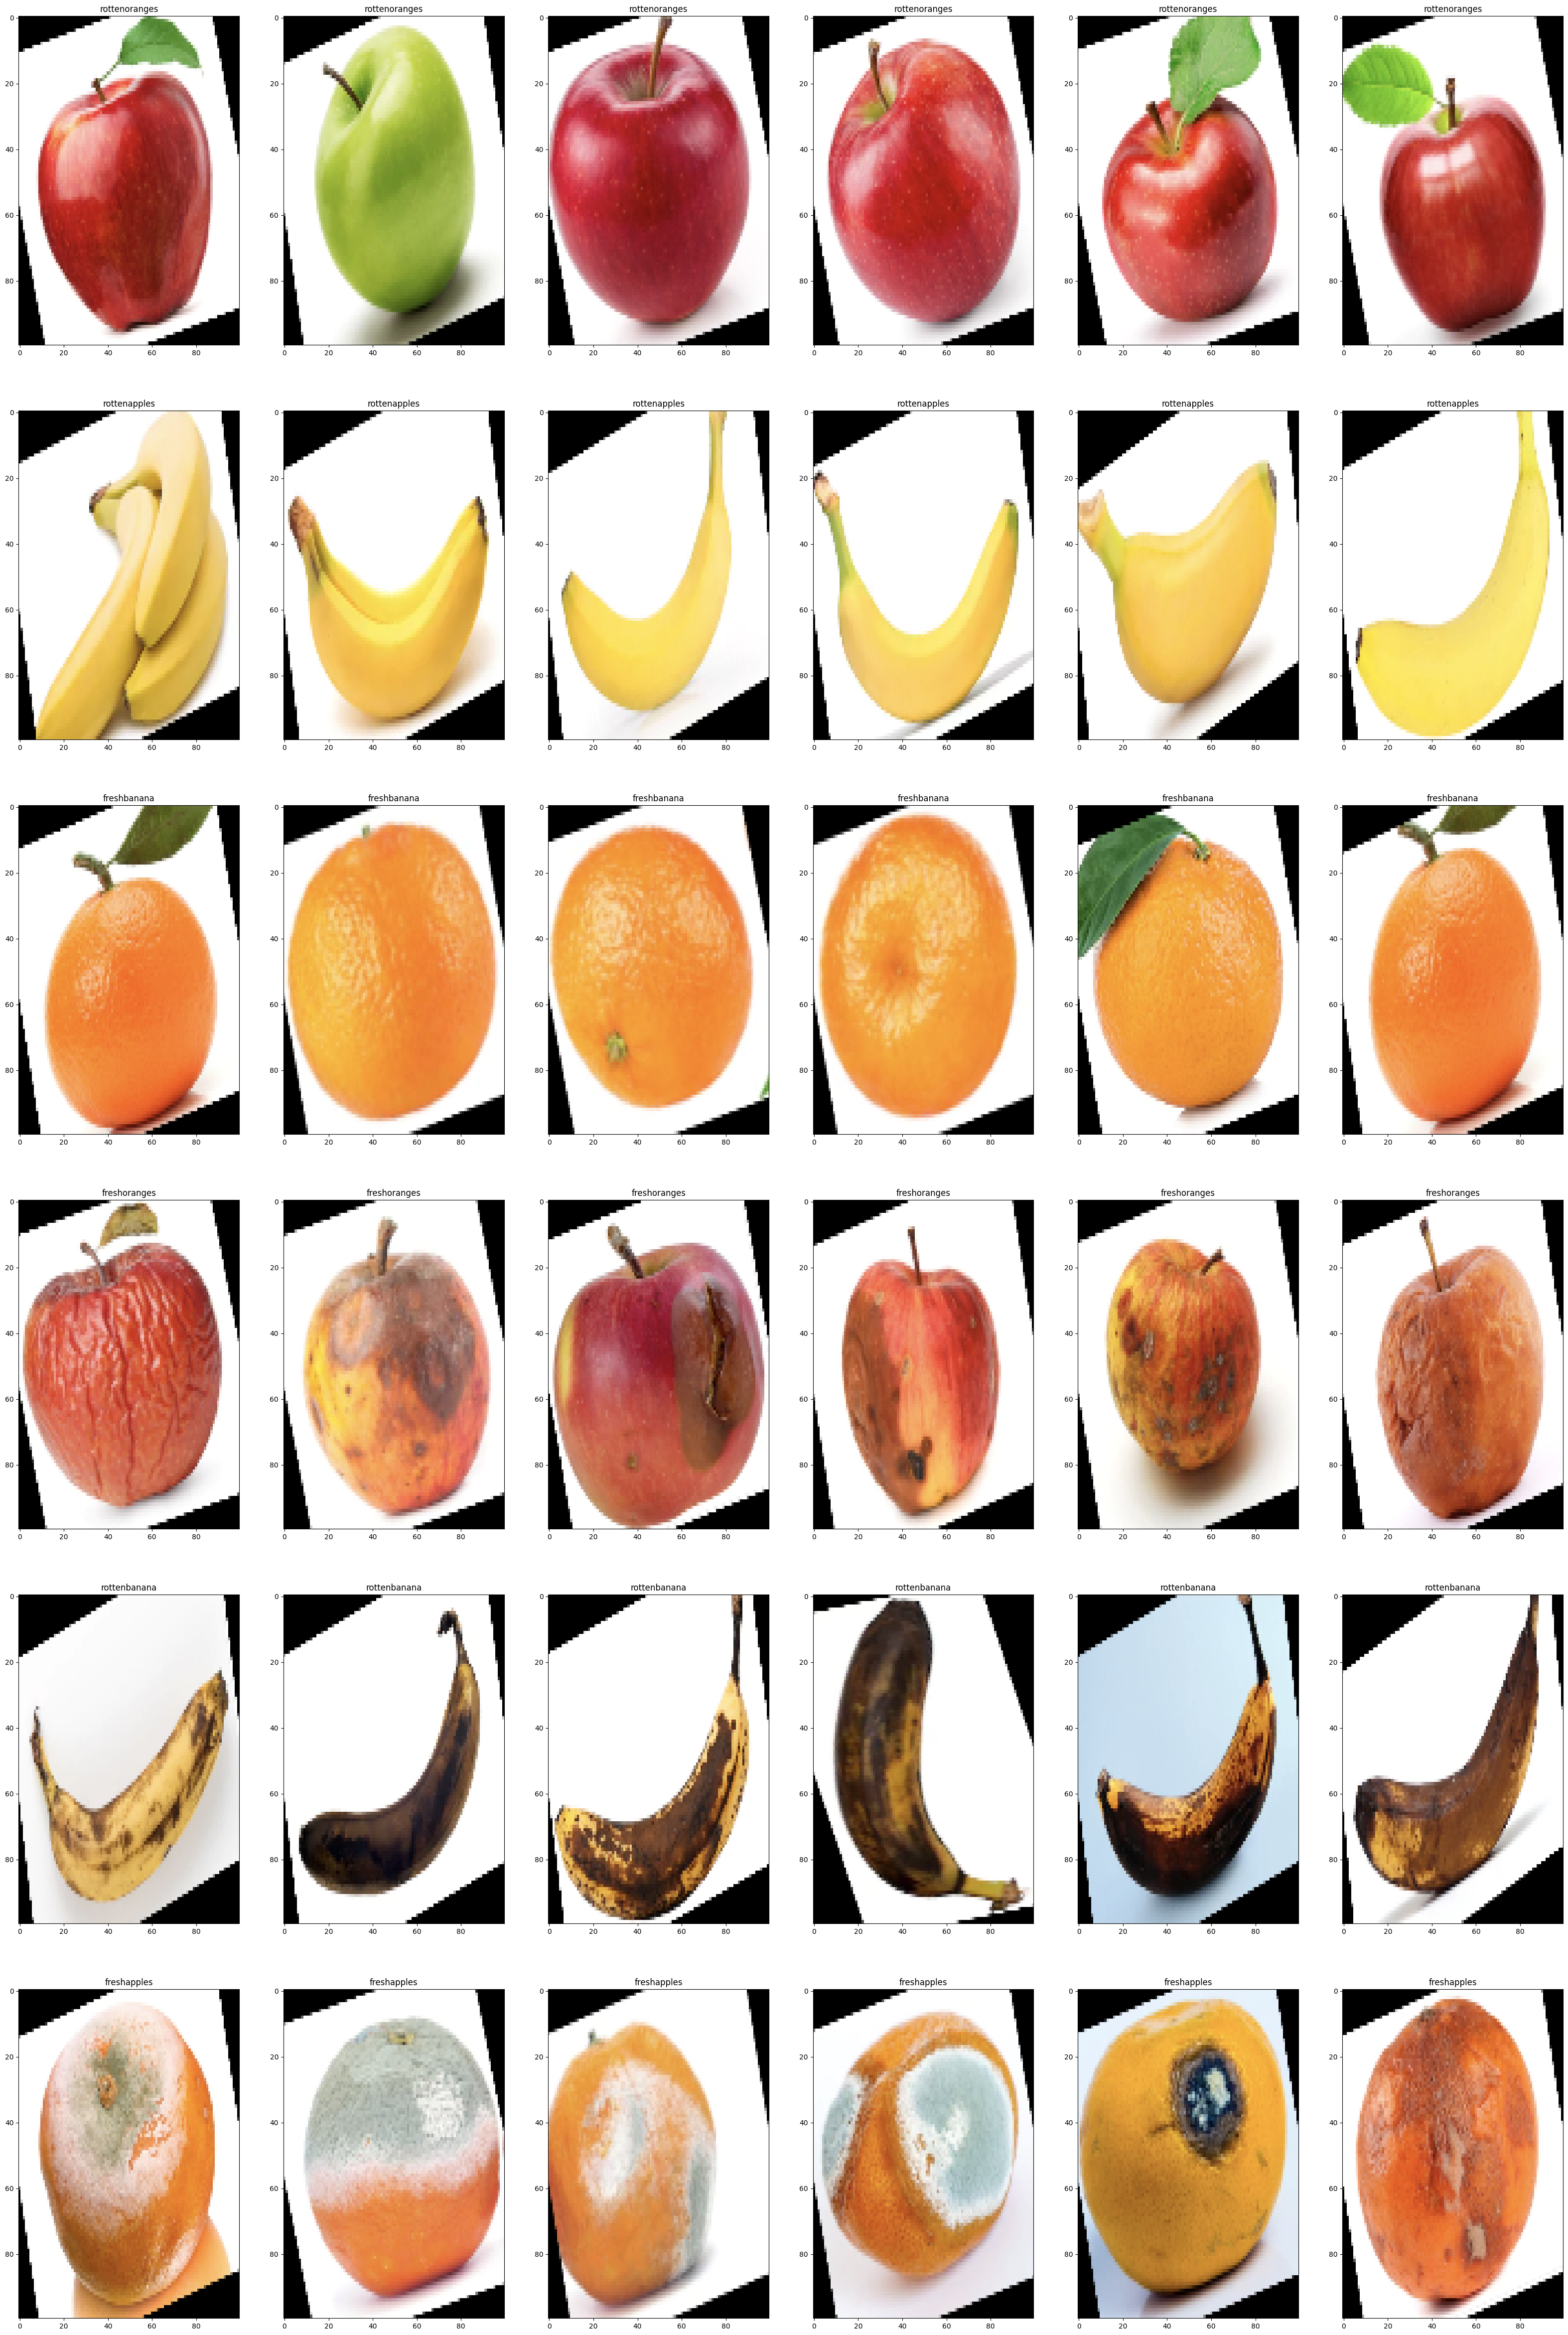

In [6]:
show_subpot(X)

In [7]:
del X

In [8]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r'C:\Users\fadel\Documents\data rpl\train')):
        if quality[0] in cata:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [9]:
X,Y=load_rottenvsfresh()

100%|██████████| 6/6 [00:16<00:00,  2.71s/it]


Shuffling your data.....


100%|██████████| 6127/6127 [00:00<00:00, 2042156.76it/s]


In [10]:
Y=np.array(Y)
X=np.array(X)

In [11]:
y_ser=pd.Series(Y)
y_ser.value_counts()

1    3575
0    2552
dtype: int64

In [12]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r'C:\Users\fadel\Documents\data rpl\train')):
        if quality[0] in cata:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y       

In [13]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|██████████| 6/6 [00:16<00:00,  2.68s/it]


Shuffling your data.....


100%|██████████| 6127/6127 [00:00<00:00, 1994915.43it/s]


In [14]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    3575
0    2552
dtype: int64

In [15]:
model = Sequential()

model.add(Conv2D(8, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 8)      32        
 ormalization)                                                   
                                                                 
 separable_conv2d (Separable  (None, 100, 100, 32)     360       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                        

In [17]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath=r'C:\Users\fadel\Documents\data rpl\train', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

c:\Users\fadel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
X=X/255.0
X_val=X_val/255.0

In [19]:
with tf.device('/gpu:0'):
    history=model.fit(X,Y,batch_size=1,validation_data=(X_val,Y_val),epochs= 10,
                 callbacks=[check_point])

Epoch 1/10
6122/6127 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7533
Epoch 1: val_loss improved from inf to 0.38094, saving model to C:\Users\fadel\Documents\data rpl\train


INFO:tensorflow:Assets written to: C:\Users\fadel\Documents\data rpl\train\assets


INFO:tensorflow:Assets written to: C:\Users\fadel\Documents\data rpl\train\assets


6127/6127 [==============================] - 59s 9ms/step - loss: 0.5368 - accuracy: 0.7534 - val_loss: 0.3809 - val_accuracy: 0.8392
Epoch 2/10
6120/6127 [============================>.] - ETA: 0s - loss: 0.3747 - accuracy: 0.8520
Epoch 2: val_loss did not improve from 0.38094
6127/6127 [==============================] - 53s 9ms/step - loss: 0.3744 - accuracy: 0.8520 - val_loss: 0.4320 - val_accuracy: 0.8048
Epoch 3/10
6126/6127 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.9063
Epoch 3: val_loss did not improve from 0.38094
6127/6127 [==============================] - 53s 9ms/step - loss: 0.2549 - accuracy: 0.9063 - val_loss: 0.4445 - val_accuracy: 0.8242
Epoch 4/10
6123/6127 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.9205
Epoch 4: val_loss did not improve from 0.38094
6127/6127 [==============================] - 52s 9ms/step - loss: 0.2223 - accuracy: 0.9205 - val_loss: 1.1328 - val_accuracy: 0.7325
Epoch 5/10
6126/6127 [=======

INFO:tensorflow:Assets written to: C:\Users\fadel\Documents\data rpl\train\assets


INFO:tensorflow:Assets written to: C:\Users\fadel\Documents\data rpl\train\assets


6127/6127 [==============================] - 53s 9ms/step - loss: 0.1688 - accuracy: 0.9396 - val_loss: 0.3495 - val_accuracy: 0.8906
Epoch 7/10
6123/6127 [============================>.] - ETA: 0s - loss: 0.1584 - accuracy: 0.9374
Epoch 7: val_loss did not improve from 0.34949
6127/6127 [==============================] - 51s 8ms/step - loss: 0.1583 - accuracy: 0.9375 - val_loss: 0.3770 - val_accuracy: 0.8786
Epoch 8/10
6120/6127 [============================>.] - ETA: 0s - loss: 0.1698 - accuracy: 0.9394
Epoch 8: val_loss did not improve from 0.34949
6127/6127 [==============================] - 51s 8ms/step - loss: 0.1696 - accuracy: 0.9394 - val_loss: 0.3777 - val_accuracy: 0.8701
Epoch 9/10
6125/6127 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9448
Epoch 9: val_loss improved from 0.34949 to 0.26557, saving model to C:\Users\fadel\Documents\data rpl\train


INFO:tensorflow:Assets written to: C:\Users\fadel\Documents\data rpl\train\assets


INFO:tensorflow:Assets written to: C:\Users\fadel\Documents\data rpl\train\assets


6127/6127 [==============================] - 55s 9ms/step - loss: 0.1438 - accuracy: 0.9448 - val_loss: 0.2656 - val_accuracy: 0.8879
Epoch 10/10
6120/6127 [============================>.] - ETA: 0s - loss: 0.1203 - accuracy: 0.9552
Epoch 10: val_loss did not improve from 0.26557
6127/6127 [==============================] - 53s 9ms/step - loss: 0.1202 - accuracy: 0.9553 - val_loss: 0.2874 - val_accuracy: 0.8995


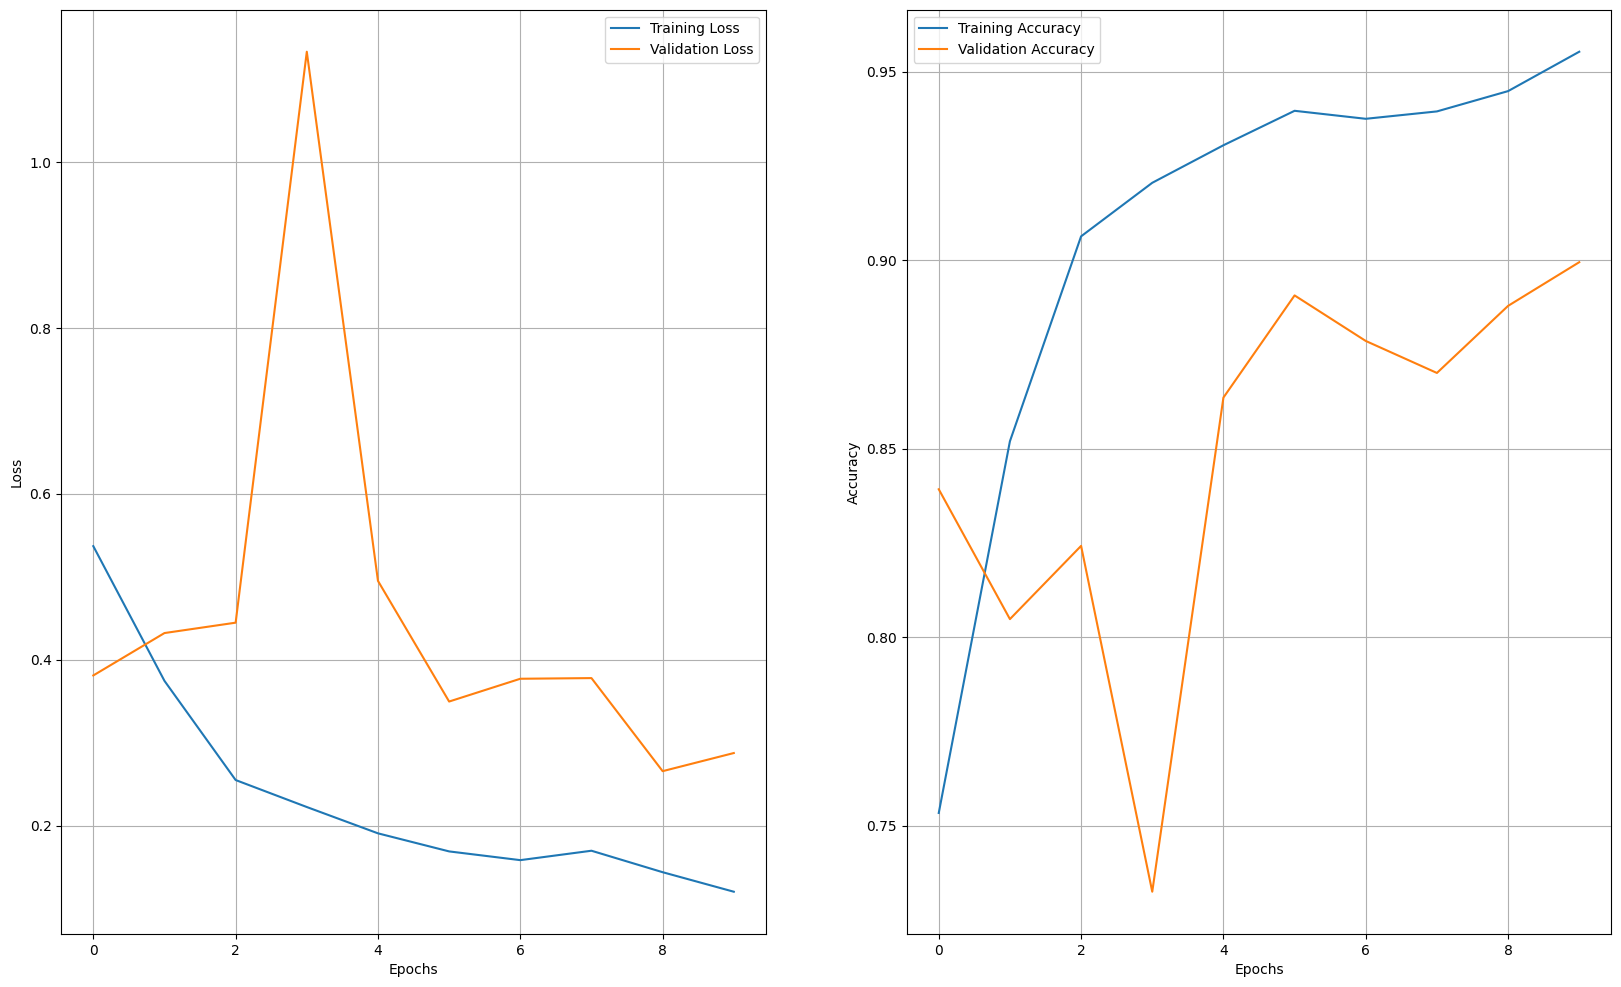

In [20]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [24]:
with tf.device('/cpu:0'):
    model.evaluate(X_val,Y_val)

192/192 [==============================] - 10s 51ms/step - loss: 0.2874 - accuracy: 0.8995


In [28]:
model.save(r'C:\Users\fadel\Documents\data rpl\model\rottenvsfresh.h5')

In [29]:
from keras.models import Model, load_model

In [30]:
new_model = load_model(r'C:\Users\fadel\Documents\data rpl\model\rottenvsfresh.h5')

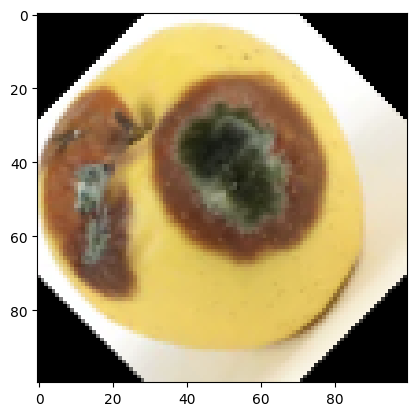

In [46]:
plt.imshow(X_val[21])

In [47]:
new_model.predict(X_val[21].reshape(1,100,100,3))

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

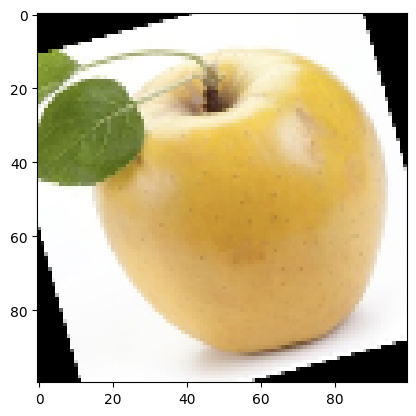

In [40]:
plt.imshow(X_val[14])

In [41]:
new_model.predict(X_val[14].reshape(1,100,100,3))

1/1 [==============================] - 0s 19ms/step


array([[0.13808997]], dtype=float32)